Zoher Ghadyali

Data Science 2016

Model Iteration 2 - Warmup Project

This notebook initially repeats the work done in the DataQuest "Improving your submission" mission with some slight modifications. I disregarded family size and family ID based off of the bar plot shown in the mission that plots each field by its p-value. So in the end, my train dataset had the additional fields (after cleaning the data in the same way as model_iteration_1.ipynb) of nameLength (the length of the person's name and potentially an indicator of wealth), title (also an indicator of wealth), and isChild which is a field I created that is 1 if the age of the passenger is less than or equal to 5 and 0 otherwise.

Below is what the train dataset looks like now.

In [277]:
import pandas
%matplotlib inline

titanic = pandas.read_csv("train.csv")

def get_title(name):
    # Use a regular expression to search for a title.  Titles always consist of capital and lowercase letters, and end 
    # with a period.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

def clean_data(df):
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    df["Fare"] = df["Fare"].fillna(df["Fare"].mean())

    df.loc[df["Sex"] == "male", "Sex"] = 0
    df.loc[df["Sex"] == "female", "Sex"] = 1

    df["Embarked"] = df["Embarked"].fillna("S")
    df.loc[df["Embarked"] == "S", "Embarked"] = 0
    df.loc[df["Embarked"] == "C", "Embarked"] = 1
    df.loc[df["Embarked"] == "Q", "Embarked"] = 2
    df["NameLength"] = df["Name"].apply(lambda x: len(x))
    titles = df["Name"].apply(get_title)
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Major": 7, "Col": 7, "Mlle": 8, 
                     "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Dona": 10, "Sir": 9, "Capt": 7, 
                     "Ms": 2}
    for k,v in title_mapping.items():
        titles[titles == k] = v

    # Add in the title column.
    df["Title"] = titles
    df["isChild"] = 0
    df.loc[df["Age"] <= 5, "isChild"] = 1
    return df

titanic = clean_data(titanic)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameLength,Title,isChild
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0,23,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1,51,3,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,22,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0,44,3,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0,24,1,0
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,2,16,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,0,23,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,349909,21.0750,NaN,0,30,4,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,347742,11.1333,NaN,0,49,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,NaN,1,35,3,0


One thing that was shown in the mission that I thought was really cool was the ability to determine which fields in the data are the most important to train off of. Using sklearn's SelectKBest function, we determine the p-value and convert it to a score by taking the negative log base 10, which means the highest scores are the lowest p-values. This quickly tells us what is important to focus on and what isn't. 

I was curious about how this function worked so I did some research and SelectKBest takes as input a score function, which in this case is f_classif which computes the f-value. According to Wikipedia, the f-value is the ratio of two mean square values and if there is a relationship between the field and the result, you would expect an f-value close to 1. I would be interested in learning more about this and how it works.

The resulting plot for all of the fields in the dataset so far is below.

Pclass:  24.5956714208
Sex:  68.8519942529
Age:  1.42925766052
SibSp:  0.534254502442
Parch:  1.82976042906
Fare:  14.2132351418
Embarked:  2.85130099045
NameLength:  23.6931901615
Title:  26.9833860721
isChild:  5.17975037692


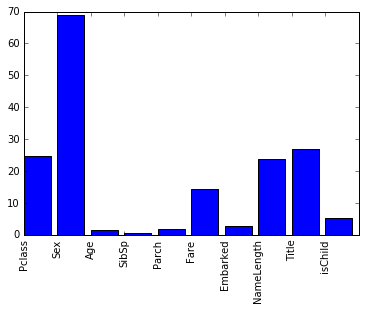

In [278]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np
from matplotlib import pyplot as plt

predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "NameLength", "Title", "isChild"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

for i in range(0, len(predictors)):
    print predictors[i] + ': ', scores[i]

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()


The plot shows that, in order, Sex, Title, Pclass, NameLength, Fare, and isChild are the most important features. It is interesting to me that we focused on age in building all of our models when it has a very low score.

The next step is to pick a model and cross validate it to see how accurate it is in the splitting the train data in test-train sets. Again, following the mission, we start with a random forest classifier which randomly creates decision trees and averages the output of the trees. In this case, we are using 150 of these random decision tres.

In [279]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Fare", "Title", "NameLength", "isChild"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
print "Accuracy", scores.mean()

Accuracy 0.810325476992


Now that we have cross-validated our model, we train it on the train data using the important predictors from SelectKBest and test the model on the test data.

In [280]:
titanic_test = pandas.read_csv("test.csv")
titanic_test = clean_data(titanic_test)

alg.fit(titanic[predictors], titanic["Survived"])

predictions = alg.predict(titanic_test[predictors])

submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("model_iteration_2_rev1.csv", index=False)

The resulting score on Kaggle was 0.77512 which is the same score we got at the end of model_iteration_1.ipynb.

The next part of the mission uses an ensemble of different classifiers. We know we have some form of linear relationship between the predictors from SelectKBest and we use a gradient boosting classifier on all of the fields. A gradient boosting classifier trains decision trees one after another which means overfitting is a problem. This is why we only use 25 in the classifier.

In [281]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold

# The algorithms we want to ensemble.
# We're using the more linear predictors for the logistic regression, and everything with the gradient boosting 
# classifier.
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "SibSp", 
    "Parch", "Fare", "Embarked", "NameLength", "Title", "isChild"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Fare", "Title", "NameLength", "isChild"]]
]

# Initialize the cross validation folds
kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # Make predictions for each algorithm on each fold
    for alg, predictors in algorithms:
        # Fit the algorithm on the training data.
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # Select and predict on the test fold.  
        # The .astype(float) is necessary to convert the dataframe to all floats and avoid an sklearn error.
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # Use a simple ensembling scheme -- just average the predictions to get the final classification.
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # Any value over .5 is assumed to be a 1 prediction, and below .5 is a 0 prediction.
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# Put all the predictions together into one array.
predictions = np.concatenate(predictions, axis=0)

# Compute accuracy by comparing to the training data.
accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print "Accuracy", accuracy

Accuracy 0.809203142536


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:40: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


Now that we have cross-validated our model, we predict off of the test data set using each algorithm. We have a more complex ensembling scheme here where we weight the output of the gradient boosting classifier higher than the logistic regression.

In [282]:
full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

# The gradient boosting classifier generates better predictions, so we weight it higher.
predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
predictions = predictions.astype(int)
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
})

submission.to_csv("model_iteration_2_rev2.csv", index=False)

Using this model, the Kaggle score was 0.79426 which is the best score I have achieved throughout this project. I believe this is in part because we made the logistic regression more accurate and, by reducing the fields to only the ones we know are important, created a less overfit and more generalizable model. I also think using the gradient boosting classifier in addition to the logistic regression worked well because they are very different.

The rest of this notebook is working on my own idea which builds off of something we discussed in class on Friday, Jan 29, 2016. The problem with using linear models is that the more fields you train off of, the more complex the model, and the more likely it is that the model will overfit to fields that are not actually significant which will increase accuracy on your train dataset but is not generalizable to the test dataset and will subsequently produce a lower score. So in looking at the bar plot from SelectKBest() generated above, I realized that if we disregard Age, Sibsp, and Parch, the least three significant fields are Fare, Embarked, and isChild. I wanted to know if aggregating these fields would be significant.

So in the three code blocks below, I compute the survival rate if passengers embarked in Southampton, Cherbourg, or Queenstown, if passengers paid under 10 pounds for their ticket, between 10 and 20 pounds, betwen 20 and 30 pounds, between 30 and 65 pounds, and between 65 and 512 pounds (the max fare a passenger paid in the train dataset on the Titanic), and if passengers were under the age of 5 (classified as Child) or not.

In [283]:
print "Embarked in Southampton Survival Rate"
survival0 = len(titanic[(titanic["Embarked"] == 0) & (titanic["Survived"] == 1)])/float(len(titanic[titanic["Embarked"] == 0]))
print survival0
print "Embarked in Cherbourg Survival Rate"
survival1 = len(titanic[(titanic["Embarked"] == 1) & (titanic["Survived"] == 1)])/float(len(titanic[titanic["Embarked"] == 1])) 
print survival1
print "Embarked in Queenstown Survival Rate"
survival2 = len(titanic[(titanic["Embarked"] == 2) & (titanic["Survived"] == 1)])/float(len(titanic[titanic["Embarked"] == 2]))
print survival2

survivalEmbarked = [survival0, survival1, survival2]

Embarked in Southampton Survival Rate
0.339009287926
Embarked in Cherbourg Survival Rate
0.553571428571
Embarked in Queenstown Survival Rate
0.38961038961


In [284]:
print "Survival Rate for Fares <=10"
tot = titanic[titanic["Fare"] <= 10]
survived = tot[tot["Survived"] == 1]
survivalFare1 = len(survived) / float(len(tot))
print survivalFare1
print "Survival Rate for Fares >10 & <=20"
tot = titanic[(titanic["Fare"] > 10) & (titanic["Fare"] <= 20)]
survived = tot[tot["Survived"] == 1]
survivalFare2 = len(survived) / float(len(tot))
print survivalFare2
print "Survival Rate for Fares >20 & <=30"
tot = titanic[(titanic["Fare"] > 20) & (titanic["Fare"] <= 30)]
survived = tot[tot["Survived"] == 1]
survivalFare3 = len(survived) / float(len(tot))
print survivalFare3
print "Survival Rate for Fares >30 & <=65"
tot = titanic[(titanic["Fare"] > 30) & (titanic["Fare"] <= 65)]
survived = tot[tot["Survived"] == 1]
survivalFare4 = len(survived) / float(len(tot))
print survivalFare4
print "Survival Rate for Fares >65 & <=", titanic["Fare"].max()
tot = titanic[(titanic["Fare"] > 30) & (titanic["Fare"] <= titanic["Fare"].max())]
survived = tot[tot["Survived"] == 1]
survivalFare5 = len(survived) / float(len(tot))
print survivalFare5

Survival Rate for Fares <=10
0.199404761905
Survival Rate for Fares >10 & <=20
0.424581005587
Survival Rate for Fares >20 & <=30
0.443661971831
Survival Rate for Fares >30 & <=65
0.483050847458
Survival Rate for Fares >65 & <= 512.3292
0.581196581197


In [285]:
print "Survival Rate for Age >5"
tot = titanic[titanic["isChild"] == 0]
survived = tot[tot["Survived"] == 1]
survivalNotChild = len(survived) / float(len(tot))
print survivalNotChild
print "Survival Rate for Age <=5"
tot = titanic[titanic["isChild"] == 1]
survived = tot[tot["Survived"] == 1]
survivalChild = len(survived) / float(len(tot))
print survivalChild

survivalChild = [survivalNotChild, survivalChild]


Survival Rate for Age >5
0.367178276269
Survival Rate for Age <=5
0.704545454545


I am not very proud of the method used in this next code block but it works. I am sure there is a cleaner and better way to do this. Basically, this code is the equivalent of finding all passengers who, for example, boarded in Southampton, paid less than 10 pounds for fare, and are not children. I created a new field called aggregate that simply averages that person's chance of surviving using the fact that the survival rate for embarking in Southamption is 33.9%, the survival rate for fares <= 10 is 19.94%, and the survival rate for passengers over the age of 5 is 36.72%. I do this for all passnegers in hopes to get more information about their chance of surviving.

In [286]:
def compute_aggregate(df):
    df["Aggregate"] = 0
    #loops through all 3 embarked categories, 0 is Southampton, 1 is Cherbourg, 2 is Queenstown
    for i in range(0, 3):
        #loops through isNotChild and isChild categories, computes agg first for all non-Children and then for children
        for j in range(0, 2):
            agg = (survivalEmbarked[i] + survivalFare1 + survivalChild[j])/float(3)
            df.loc[((df["Embarked"] == i) & (df["Fare"] <= 10) & (df["isChild"] == j)), "Aggregate"] = agg
            agg = (survivalEmbarked[i] + survivalFare2 + survivalChild[j])/float(3)
            df.loc[((df["Embarked"] == i) & (df["Fare"] > 10) & (df["Fare"] <= 20) & (df["isChild"] == j)), "Aggregate"] = agg
            agg = (survivalEmbarked[i] + survivalFare3 + survivalChild[j])/float(3)
            df.loc[((df["Embarked"] == i) & (df["Fare"] > 20) & (df["Fare"] <= 30) & (df["isChild"] == j)), "Aggregate"] = agg
            agg = (survivalEmbarked[i] + survivalFare4 + survivalChild[j])/float(3)
            df.loc[((df["Embarked"] == i) & (df["Fare"] > 30) & (df["Fare"] <= 65 ) & (df["isChild"] == j)), "Aggregate"] = agg
            agg = (survivalEmbarked[i] + survivalFare5 + survivalChild[j])/float(3)
            df.loc[((df["Embarked"] == i) & (df["Fare"] > 65) & (df["Fare"] <= df["Fare"].max() ) & (df["isChild"] == j)), "Aggregate"] = agg
    return df

titanic = compute_aggregate(titanic)

My next step was to determine if the field I had created was now important and scored highly using SelectKBest(). Using all of the fields, I plot the predictors and their scores below, just the same as I did above but with the new Aggregate field added.

Pclass:  24.5956714208
Sex:  68.8519942529
Age:  1.42925766052
SibSp:  0.534254502442
Parch:  1.82976042906
Fare:  14.2132351418
Embarked:  2.85130099045
NameLength:  23.6931901615
Title:  26.9833860721
isChild:  5.17975037692
Aggregate:  28.4125829099


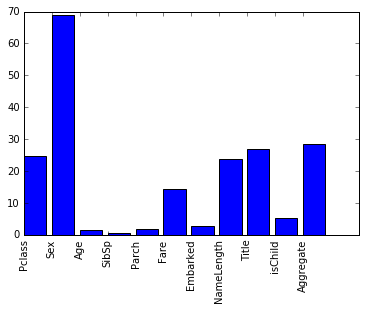

In [287]:
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "NameLength", "Title", "isChild", "Aggregate"]

# Perform feature selection
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

for i in range(0, len(predictors)):
    print predictors[i] + ': ', scores[i]

plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

So this is really interesting because I was expecting that even if the Aggregate field worked well, it could at most have a score that is a summation of the scores produced by Fare, Embarked, and isChild which totals 22.24. The score of Aggregate is actually 28.41 which exceeds the sum of the three scores by 6.17. I am really curious about this and how this happened. I briefly tried playing with weighting the fields differently and how they affected the calculated agg but I found that I could only produce very little change in Aggregate's score or decrease it. I would like to investigate and play with this further.

The next step was now to put my new and important Aggregate field into use. I used a random forest classifier and this was really just a benchmark to see if there would be any significant change in accuracy or Kaggle score. My motivation for trying this was to improve the score achieved by linear models, which I try after testing the rfc.

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation

predictors = ["Pclass", "Sex", "Title", "NameLength", "Aggregate"]

alg = RandomForestClassifier(random_state=1, n_estimators=150, min_samples_split=8, min_samples_leaf=4)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
print "Accuracy", scores.mean()

Accuracy 0.805836139169


Below, we apply our compute_aggregate function to the test data and one important thing to note here is that we are taking the survival rates we found in the training data and applying it to the entire test dataset. This is our only option but it could also be a reason for us to score less well. It might be possible that while only 33.9% of passengers who embarked in Southampton survived, in the test data set it could be that 50% of the passengers who embarked in Southamption survived and we have no way to account for this in the Aggregate field.

In [289]:
titanic_test = compute_aggregate(titanic_test)
alg.fit(titanic[predictors], titanic["Survived"])

predictions = alg.predict(titanic_test[predictors])

# Create a new dataframe with only the columns Kaggle wants from the dataset.
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("model_iteration_2_rev3.csv", index=False)

This model achieved a Kaggle score of 0.77033 which is actually about 0.005 lower then what was achieved by using rfc earlier in this notebook. One possible explanation for this is that we used more fields previously because we were using Fare and isChild and we replaced these with Aggregate. The other thing is that Aggregate now smooths out the predictions that were made off of Fare and isChild. It could be the case that averaging the data works less well for random forest which intuitively makes sense to me since it is randomly generating decision trees and I am smoothing out the metrics chosen for certain decisions involving Fare and isChild.

Okay so let's use the Aggregate field in a place where we expect it to actually matter now, which is in a linear model, like LogisticRegression.

In [290]:
alg = LogisticRegression(random_state=1)
scores = cross_validation.cross_val_score(alg, titanic[predictors], titanic["Survived"], cv=3)
print "Accuracy", scores.mean()

Accuracy 0.785634118967


In [291]:
alg.fit(titanic[predictors], titanic["Survived"])

predictions = alg.predict(titanic_test[predictors])

submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })

submission.to_csv("model_iteration_2_rev4.csv", index=False)

We now have a Kaggle score of 0.77033. If you look back at model_iteration_1.ipynb, when we used the logistic regression model, we had a Kaggle score of 0.75120 so by creating and using the Aggregate field, we see a 1.913% improvement which is good and means we have a method to improve linear models.

More domain knowledge and more knowledge of the data itself and what is and is not important, beyond just using SelectKBest would probably help aggregate data in a way that is effective, improving linear models.

Finally, I tried using the Aggregate field on our previous ensemble method. I was hoping that aggregate would produce a better logistic regression and this could in turn improve the score of the model.

In [292]:
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=3), ["Pclass", "Sex", "Age", "SibSp", 
    "Parch", "Fare", "Embarked", "NameLength", "Title", "isChild", "Aggregate"]],
    [LogisticRegression(random_state=1), ["Pclass", "Sex", "Title", "NameLength", "Aggregate"]]
]

kf = KFold(titanic.shape[0], n_folds=3, random_state=1)

predictions = []
for train, test in kf:
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    for alg, predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

predictions = np.concatenate(predictions, axis=0)

accuracy = sum(predictions[predictions == titanic["Survived"]]) / len(predictions)
print "Accuracy", accuracy

Accuracy 0.812570145903


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


In [293]:
full_predictions = []
for alg, predictors in algorithms:
    # Fit the algorithm using the full training data.
    alg.fit(titanic[predictors], titanic["Survived"])
    # Predict using the test dataset.  We have to convert all the columns to floats to avoid an error.
    predictions = alg.predict_proba(titanic_test[predictors].astype(float))[:,1]
    full_predictions.append(predictions)

predictions = (full_predictions[0] * 3 + full_predictions[1]) / 4
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
predictions = predictions.astype(int)
submission = pandas.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
})

submission.to_csv("model_iteration_2_rev5.csv", index=False)

The resultig Kaggle score was 0.77990 which is lower than what we achieved earlier in this notebook. One possibility is that when we ensemble, our classifiers have to be similar in accuracy and while we improved the accuracy of the logistic regression model, the gradient boosting classifier might not have increased in accuracy because of the Aggregate field. Another factor is that we weight gradient boosting more but we didn't improve that classifier at all so we are not seeing improvement.

For further exploration I would like to explore SelectKBest() which I kind of took as the end-all be-all of feature selection in this project and look for alternatives. I would really like to explore situations where SelectKBest() and another feature-selection tool differ and figure out why they differ. I would also really like to play around with changing the parameters on my Aggregate field which right now weights each field that it aggregates evenly. One method that I am thinking of is possibly using the p-value or the score to determine the weight that a given field should have when aggregating. One additional thing that I would like to do with more time is actually clean up this model a bit and rewrite my helper functions in more efficient, cleaner, and more self-explanatory ways.